In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer

In [2]:
train=pd.read_csv(r"C:\Users\olaki\Documents\Home-Credit-files\application_train.csv")
test=pd.read_csv(r"C:\Users\olaki\Documents\Home-Credit-files\application_test.csv")

# GLIMPSE OF DATA

In [3]:
print("Training dataset shape:",train.shape)
print('Test dataset shape:',test.shape)

Training dataset shape: (307511, 122)
Test dataset shape: (48744, 121)


In [4]:
pd.set_option('display.max_columns', None)
train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working               Higher education   
1   Unaccompanied          Working  Secondary / secondary special   
2             NaN          Working               Higher education   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0            Married  House / apartment                    0.018850   
1            Married  House / apartment                    0.035792   
2            Married  House / apartment                    0.019101   
3            Married  House / apartment                    0.026392   
4            Married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0      -19241          -2329            -5170.0             -812          NaN   
1      -18064          -4469            -9118.0            -1623          NaN   
2      -20038          -4458            -2175.0            -3503          5.0   
3      -13976          -1866            -2000.0            -4208          NaN   
4      -13040          -2191            -4000.0            -4262         16.0   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           0   
1           1               1                0                 1           0   
2           1               1                0                 1           0   
3           1               1                0                 1           1   
4           1               1                1                 1           0   

   FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           1                 NaN              2.0                     2   
1           0  Low-skill Laborers              2.0                     2   
2           0             Drivers              2.0                     2   
3           0         Sales staff              4.0                     2   
4           0                 NaN              3.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                    TUESDAY   
1                            2                     FRIDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                     FRIDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       18                           0   
1                        9                           0   
2                       14                           0   
3                       11                           0   
4                        5                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                   

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### unique ID

In [8]:
# unique applications
id_unique=train["SK_ID_CURR"].nunique()
print("Unique applicants: ", (id_unique/len(train["SK_ID_CURR"])*100),"%")

Unique applicants:  100.0 %


### deleting columns

Deleting columns that I don't think have any effect on default.

In [9]:
train.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'],axis=1,inplace=True)
test.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'],axis=1,inplace=True)

# Misssing values

In [10]:
def missing_values_df(df):
       # sum of missing values in each column
        mis_val = df.isna().sum()
        #percentage of missing values
        mis_val_percent = 100 * df.isna().sum() / len(df)
        
        #creating a daframe with above information
        mis_val_df = pd.DataFrame({"Missing values":mis_val,"Percentage of all values":mis_val_percent})
        
        mis_val_df=mis_val_df[mis_val_df['Missing values']!=0].sort_values(
                'Percentage of all values', ascending=False).round(1)

        return mis_val_df

In [11]:
missing_values = missing_values_df(train)
missing_values

Missing values  Percentage of all values
COMMONAREA_MEDI                   214865                      69.9
COMMONAREA_AVG                    214865                      69.9
COMMONAREA_MODE                   214865                      69.9
NONLIVINGAPARTMENTS_MEDI          213514                      69.4
NONLIVINGAPARTMENTS_MODE          213514                      69.4
...                                  ...                       ...
EXT_SOURCE_2                         660                       0.2
AMT_GOODS_PRICE                      278                       0.1
AMT_ANNUITY                           12                       0.0
CNT_FAM_MEMBERS                        2                       0.0
DAYS_LAST_PHONE_CHANGE                 1                       0.0

[67 rows x 2 columns]

In [12]:
print("Amount of people who don't own the car: ",len(train[train['FLAG_OWN_CAR']=='N']))
print("Amount of missing values in own car age column: ",len(train[train['OWN_CAR_AGE'].isna()]))

Amount of people who don't own the car:  202924
Amount of missing values in own car age column:  202929


Deleting all columns related to the flat, cause they have too many missing values (more than 47%).

In [13]:
columns_AVG_MODE_MEDI_with_nan = [col for col in missing_values.index if any(word in col for word in ['AVG', 'MEDI', 'MODE'])]
train_clean=train.drop(columns=columns_AVG_MODE_MEDI_with_nan)
test_clean=test.drop(columns=columns_AVG_MODE_MEDI_with_nan)
missing_values.drop(columns_AVG_MODE_MEDI_with_nan, inplace=True)
print("Number of columns now: ",train_clean.shape[1])

Number of columns now:  72


In [14]:
train_clean.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0       -9461           -637            -3648.0            -2120          NaN   
1      -16765          -1188            -1186.0             -291          NaN   
2      -19046           -225            -4260.0            -2531         26.0   
3      -19005          -3039            -9833.0            -2437          NaN   
4      -19932          -3038            -4311.0            -3458          NaN   

   FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  REG_REGION_NOT_LIVE_REGION  \
0                            2                           0   
1                            1                           0   
2                            2                           0   
3                            2                           0   
4                            2                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0   

# Column types

In [15]:
train_clean.dtypes.value_counts()

int64      39
float64    22
object     11
dtype: int64

In [16]:
train_clean.dtypes[train.dtypes == 'object']

NAME_CONTRACT_TYPE     object
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
NAME_TYPE_SUITE        object
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS     object
NAME_HOUSING_TYPE      object
OCCUPATION_TYPE        object
ORGANIZATION_TYPE      object
dtype: object

In [17]:
train_clean.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE      2
CODE_GENDER             3
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_TYPE_SUITE         7
NAME_INCOME_TYPE        8
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      6
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        18
ORGANIZATION_TYPE      58
dtype: int64

# Visualizing categorical data

### Visualizing most of categorical data.

In [18]:
# creating dataframe with categorical data
categorical_data=train_clean[train_clean.dtypes[train_clean.dtypes == 'object'].index]
categorical_data=pd.concat([categorical_data, train_clean.loc[:, train_clean.columns.isin(["FLAG_DOCUMENT_{}".format(i) for i in range(2, 22)])]], axis=1)

print("Number of column FLAG_MOBIL: ",train_clean.columns.get_loc("FLAG_MOBIL"))
print("Number of column REG_REGION_NOT_LIVE_REGION: ",train_clean.columns.get_loc("REG_REGION_NOT_LIVE_REGION"))
print("Number of column REGION_RATING_CLIENT: ",train_clean.columns.get_loc("REGION_RATING_CLIENT"))

categorical_data=pd.concat([categorical_data,train_clean.iloc[:,list(range(21, 27)) + list(range(29, 37)) ] ])

categorical_data.head()

Number of column FLAG_MOBIL:  21
Number of column REG_REGION_NOT_LIVE_REGION:  31
Number of column REGION_RATING_CLIENT:  29


NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE       ORGANIZATION_TYPE  FLAG_DOCUMENT_2  \
0  House / apartment        Laborers  Business Entity Type 3              0.0   
1  House / apartment      Core staff                  School              0.0   
2  House / apartment        Laborers              Government              0.0   
3  House / apartment        Laborers  Business Entity Type 3              0.0   
4  House / apartment      Core staff                Religion              0.0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0              1.0              0.0              0.0              0.0   
1              1.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              1.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0              0.0              0.0              0.0               0.0   
1              0.0              0.0              0.0               0.0   
2              0.0              0.0              0.0               0.0   
3              0.0              0.0              0.0               0.0   
4              0.0              1.0              0.0               0.0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  FLAG_MOBIL  \
0               0.0               0.0               0.0         NaN   
1               0.0               0.0               0.0         NaN   
2               0.0               0.0               0.0         NaN   
3               0.0               0.0               0.0         NaN   
4               0.0               0.0               0.0         NaN   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0             NaN              NaN               NaN         NaN         NaN   
1             NaN              NaN               NaN         NaN         NaN   
2             NaN              NaN               NaN         NaN         NaN   
3             NaN   

In [19]:
def grid_of_countplots(df):
    cols = 2
    rows = int(df.shape[1]/cols)
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 150))
    sns.set(style="darkgrid")
    for r in range(rows):
        for c in range(cols):
            idx = r*cols + c
            sns.countplot(data=df, x=df.iloc[:,idx], ec = "blue",palette="viridis",ax=ax[r,c])
            ax[r,c].set_title(df.iloc[:,idx].name)
           
    #plt.subplots_adjust(hspace = 1, wspace = 0.2)        
    plt.tight_layout()
    plt.show()
     

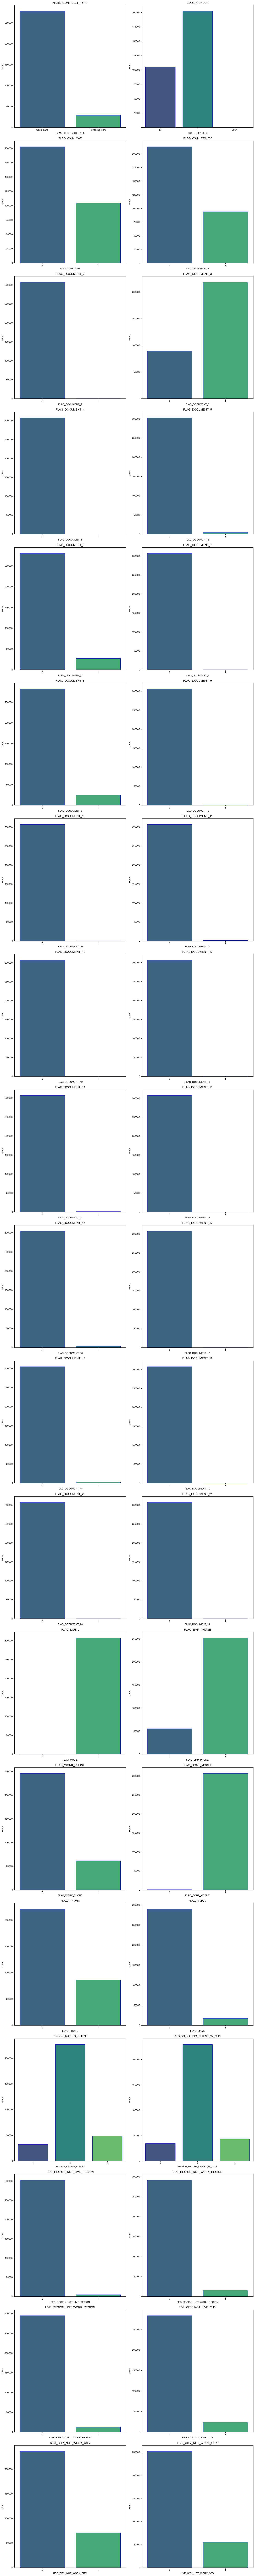

In [20]:
#choosing columns with number of unique values less than 5
nunique_under_5_categorical=train[[col for col in categorical_data if categorical_data[col].nunique() < 5]]
grid_of_countplots(nunique_under_5_categorical)   

### Countplots of rest of the categorical data

In [21]:
nunique_more_5_categorical=train[[col for col in categorical_data if train_clean[col].nunique() > 5]]
nunique_more_5_categorical

NAME_TYPE_SUITE      NAME_INCOME_TYPE    NAME_FAMILY_STATUS  \
0        Unaccompanied               Working  Single / not married   
1               Family         State servant               Married   
2        Unaccompanied               Working  Single / not married   
3        Unaccompanied               Working        Civil marriage   
4        Unaccompanied               Working  Single / not married   
...                ...                   ...                   ...   
307506   Unaccompanied               Working             Separated   
307507   Unaccompanied             Pensioner                 Widow   
307508   Unaccompanied               Working             Separated   
307509   Unaccompanied  Commercial associate               Married   
307510   Unaccompanied  Commercial associate               Married   

        NAME_HOUSING_TYPE OCCUPATION_TYPE       ORGANIZATION_TYPE  
0       House / apartment        Laborers  Business Entity Type 3  
1       House / apartment      Core staff                  School  
2       House / apartment        Laborers              Government  
3       House / apartment        Laborers  Business Entity Type 3  
4       House / apartment      Core staff                Religion  
...                   ...             ...                     ...  
307506       With parents     Sales staff                Services  
307507  House / apartment             NaN                     XNA  
307508  House / apartment        Managers                  School  
307509  House / apartment        Laborers  Business Entity Type 1  
307510  House / apartment        Laborers  Business Entity Type 3  

[307511 rows x 6 columns]

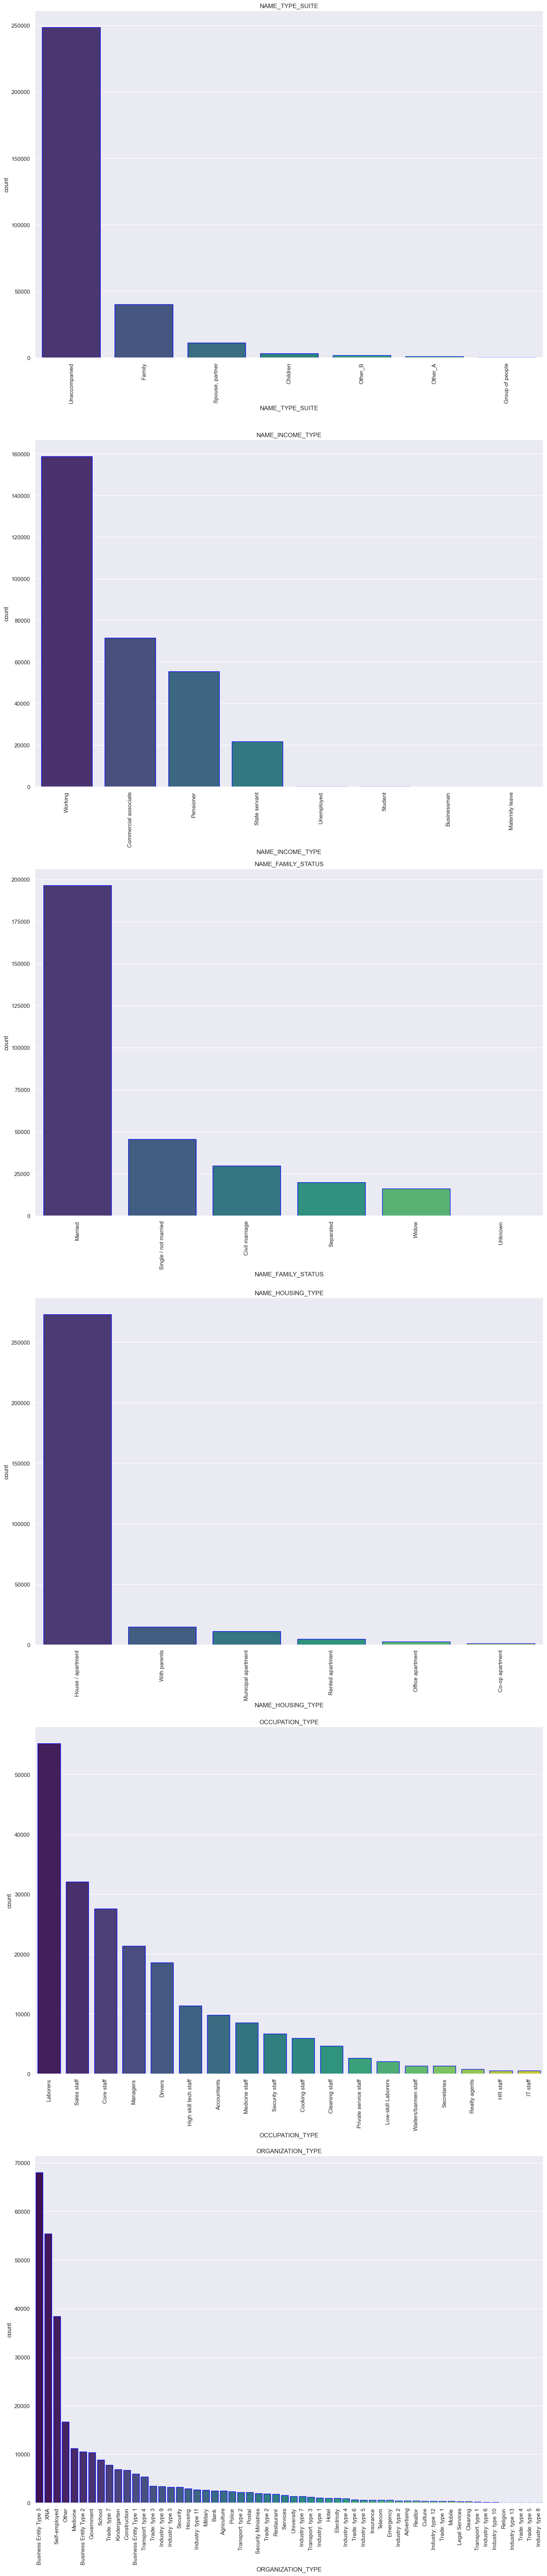

In [22]:
nunique_more_5_categorical=train_clean[[col for col in categorical_data if train_clean[col].nunique() > 5]]
fig, ax = plt.subplots(nrows=len(nunique_more_5_categorical.columns), ncols=1, figsize=(15, 70))
for number,i in enumerate(nunique_more_5_categorical.columns):
    sns.countplot(data=nunique_more_5_categorical, x=nunique_more_5_categorical[i], order = nunique_more_5_categorical.iloc[:,number].value_counts().index,ec = "blue",palette="viridis",ax=ax[number])
    ax[number].set_title(i)
    ax[number].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


# Outliers

In [23]:
#creating dataframe with numerical data
numerical_data=train_clean.loc[:,~train_clean.columns.isin(categorical_data.columns)]
numerical_data=numerical_data.loc[:,numerical_data.columns!="TARGET"]
numerical_data.head()


CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  CNT_FAM_MEMBERS  EXT_SOURCE_1  EXT_SOURCE_2  \
0            -2120          NaN              1.0      0.083037      0.262949   
1             -291          NaN              2.0      0.311267      0.622246   
2            -2531         26.0              1.0           NaN      0.555912   
3            -2437          NaN              2.0           NaN      0.650442   
4            -3458          NaN              1.0           NaN      0.322738   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.139376                       2.0                       2.0   
1           NaN                       1.0                       0.0   
2      0.729567                       0.0                       0.0   
3           NaN                       2.0                       0.0   
4           NaN                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                       2.0                       2.0                 -1134.0   
1                       1.0                       0.0                  -828.0   
2                       0.0                       0.0                  -815.0   
3                       2.0                       0.0                  -617.0   
4                       0.0                       0.0                 -1106.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0

In [24]:
def grid_of_boxplots(df):
    cols = 2
    rows = int(np.ceil(df.shape[1]/cols))
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 100))
    for number, name in enumerate(df.columns):
        row=number//2
        col=number%2
        sns.boxplot(data=df, x=df[name],ax=ax[row,col])
        ax[row,col].set_title(name)        
    plt.tight_layout()
    plt.show()

In [25]:
#grid_of_boxplots(numerical_data)

In [26]:
len(numerical_data["AMT_ANNUITY"])

307511

In [27]:
def find_outliers_IQR(df):
   Q1=[]
   Q3=[]
   IQR=[]
   outliers=[]
   percentage_outliers=[]
   for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    out = len(df[((df[i]<(q1-1.5*iqr)) | (df[i]>(q3+1.5*iqr)))])
    per=np.round(out/len(df[i])*100,2)
    Q1.append(q1)
    Q3.append(q3)
    IQR.append(iqr)
    outliers.append(out)
    percentage_outliers.append(per)
   df_outliers=pd.DataFrame({"quartile 1":Q1, "quartile 3":Q3,"IQR":IQR,"number of outliers":outliers,"percentage of outliers":percentage_outliers}, index=df.columns)
   return df_outliers

In [28]:
pd.set_option('display.max_rows', None)
find_outliers_IQR(numerical_data)

quartile 1     quartile 3            IQR  \
CNT_CHILDREN                     0.000000       1.000000       1.000000   
AMT_INCOME_TOTAL            112500.000000  202500.000000   90000.000000   
AMT_CREDIT                  270000.000000  808650.000000  538650.000000   
AMT_ANNUITY                  16524.000000   34596.000000   18072.000000   
AMT_GOODS_PRICE             238500.000000  679500.000000  441000.000000   
REGION_POPULATION_RELATIVE       0.010006       0.028663       0.018657   
DAYS_BIRTH                  -19682.000000  -12413.000000    7269.000000   
DAYS_EMPLOYED                -2760.000000    -289.000000    2471.000000   
DAYS_REGISTRATION            -7479.500000   -2010.000000    5469.500000   
DAYS_ID_PUBLISH              -4299.000000   -1720.000000    2579.000000   
OWN_CAR_AGE                      5.000000      15.000000      10.000000   
CNT_FAM_MEMBERS                  2.000000       3.000000       1.000000   
EXT_SOURCE_1                     0.334007       0.675053       0.341045   
EXT_SOURCE_2                     0.392457       0.663617       0.271160   
EXT_SOURCE_3                     0.370650       0.669057       0.298407   
OBS_30_CNT_SOCIAL_CIRCLE         0.000000       2.000000       2.000000   
DEF_30_CNT_SOCIAL_CIRCLE         0.000000       0.000000       0.000000   
OBS_60_CNT_SOCIAL_CIRCLE         0.000000       2.000000       2.000000   
DEF_60_CNT_SOCIAL_CIRCLE         0.000000       0.000000       0.000000   
DAYS_LAST_PHONE_CHANGE       -1570.000000    -274.000000    1296.000000   
AMT_REQ_CREDIT_BUREAU_HOUR       0.000000       0.000000       0.000000   
AMT_REQ_CREDIT_BUREAU_DAY        0.000000       0.000000       0.000000   
AMT_REQ_CREDIT_BUREAU_WEEK       0.000000       0.000000       0.000000   
AMT_REQ_CREDIT_BUREAU_MON        0.000000       0.000000       0.000000   
AMT_REQ_CREDIT_BUREAU_QRT        0.000000       0.000000       0.000000   
AMT_REQ_CREDIT_BUREAU_YEAR       0.000000       3.000000       3.000000   

                            number of outliers  percentage of outliers  
CNT_CHILDREN                              4272                    1.39  
AMT_INCOME_TOTAL                         14035                    4.56  
AMT_CREDIT                                6562                    2.13  
AMT_ANNUITY                               7504                    2.44  
AMT_GOODS_PRICE                          14728                    4.79  
REGION_POPULATION_RELATIVE                8412                    2.74  
DAYS_BIRTH                                   0                    0.00  
DAYS_EMPLOYED                            72217                   23.48  
DAYS_REGISTRATION                          659                    0.21  
DAYS_ID_PUBLISH                              0                    0.00  
OWN_CAR_AGE                               4932                    1.60  
CNT_FAM_MEMBERS                           4007                    1.30  
EXT_SOURCE_1                                 0                    0.00  
EXT_SOURCE_2                                 0                    0.00  
EXT_SOURCE_3                                 0                    0.00  
OBS_30_CNT_SOCIAL_CIRCLE                 19971                    6.49  
DEF_30_CNT_SOCIAL_CIRCLE                 35166                   11.44  
OBS_60_CNT_SOCIAL_CIRCLE                 19564                    6.36  
DEF_60_CNT_SOCIAL_CIRCLE                 25769                    8.38  
DAYS_LAST_PHONE_CHANGE                     435                    0.14  
AMT_REQ_CREDIT_BUREAU_HOUR                1626                    0.53  
AMT_REQ_CREDIT_BUREAU_DAY                 1489                    0.48  
AMT_REQ_CREDIT_BUREAU_WEEK                8536                    2.78  
AMT_REQ_CREDIT_BUREAU_MON                43759                   14.23  
AMT_REQ_CREDIT_BUREAU_QRT                50575                   16.45  
AMT_REQ_CREDIT_BUREAU_YEAR                3364                    1.09

# Visualization

### Target column - balanced or not?

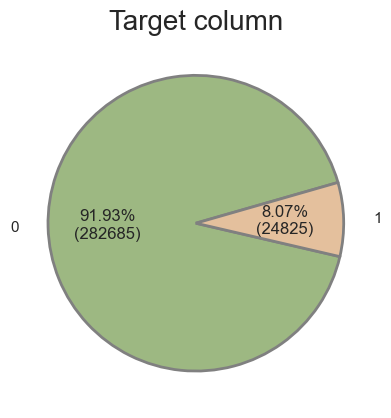

In [29]:
colors = ['#9DB882', '#E4C09D']
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.2f}%\n({:d})".format(pct, absolute)

plt.pie(train["TARGET"].value_counts(), labels=['0','1'], autopct = lambda pct: func(pct, train["TARGET"].value_counts()),
        labeldistance=1.2, wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'grey' }, colors=colors,
        startangle = 16)
plt.title("Target column",fontsize=20)
plt.show()

As we can see, there is a high imbalance between the two clasess. I propably will oversample the data.

# CLEANING DATA

## Dealing with missing values

In [30]:
missing_values

Missing values  Percentage of all values
OWN_CAR_AGE                         202929                      66.0
EXT_SOURCE_1                        173378                      56.4
OCCUPATION_TYPE                      96391                      31.3
EXT_SOURCE_3                         60965                      19.8
AMT_REQ_CREDIT_BUREAU_WEEK           41519                      13.5
AMT_REQ_CREDIT_BUREAU_DAY            41519                      13.5
AMT_REQ_CREDIT_BUREAU_MON            41519                      13.5
AMT_REQ_CREDIT_BUREAU_QRT            41519                      13.5
AMT_REQ_CREDIT_BUREAU_HOUR           41519                      13.5
AMT_REQ_CREDIT_BUREAU_YEAR           41519                      13.5
NAME_TYPE_SUITE                       1292                       0.4
DEF_30_CNT_SOCIAL_CIRCLE              1021                       0.3
OBS_60_CNT_SOCIAL_CIRCLE              1021                       0.3
DEF_60_CNT_SOCIAL_CIRCLE              1021                       0.3
OBS_30_CNT_SOCIAL_CIRCLE              1021                       0.3
EXT_SOURCE_2                           660                       0.2
AMT_GOODS_PRICE                        278                       0.1
AMT_ANNUITY                             12                       0.0
CNT_FAM_MEMBERS                          2                       0.0
DAYS_LAST_PHONE_CHANGE                   1                       0.0

In [98]:
train_clean[train_clean["DAYS_LAST_PHONE_CHANGE"].isna()] # applicant has work phone, so I change DAYS_LAST_PHONE_CHANGE to median

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
15709       0         Cash loans           M            Y               Y   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
15709             0          126000.0    278613.0      25911.0   

       AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
15709         252000.0   Unaccompanied          Working   Incomplete higher   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
15709            Married  House / apartment                    0.010643   

       DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
15709       -8574           -293            -4790.0            -1075   

       OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
15709         21.0           0               1                0   

       FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
15709                 1           0           0             NaN   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
15709              2.0                     2                            2   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
15709                           0                           0   

       LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
15709                            0                       0   

       REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  \
15709                       0                        0     Trade: type 3   

       EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
15709           NaN           NaN           NaN                       0.0   

       DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
15709                       0.0                       0.0   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
15709                       0.0                     NaN                0   

       FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
15709                0                0                0                0   

       FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
15709                0                1                0                 0   

       FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
15709                 0                 0                 0                 0   

       FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
15709                 0                 0                 0                 1   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
15709                 0                 0                 0   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
15709                         NaN                        NaN   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
15709                         NaN                        NaN   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
15709                        NaN                         NaN

In [119]:
# almost all of the missing values is because loan applicant don't have a car
# missing values in CNT_FAM_MEMBERS I'm changing to 0
train_clean[["OWN_CAR_AGE","CNT_FAM_MEMBERS"]]=train_clean[["OWN_CAR_AGE","CNT_FAM_MEMBERS"]].fillna(0) 
train_clean["OCCUPATION_TYPE"]=train_clean["OCCUPATION_TYPE"].fillna("Unemployed") 

#changing missing values in EXT_SOURCE and DAYS_LAST_PHONE_CHANGE to their median
imputer = SimpleImputer(strategy='median')
train_clean[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE']] = imputer.fit_transform(train_clean[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE']])

AMT_REQ_CREDIT_BUREU_AND_SOCIAL_CIRCLE=[col for col in train_clean.columns if "AMT_REQ_CREDIT_BUREAU" in col or "_CNT_SOCIAL_CIRCLE" in col]
train_clean[AMT_REQ_CREDIT_BUREU_AND_SOCIAL_CIRCLE]=train_clean[AMT_REQ_CREDIT_BUREU_AND_SOCIAL_CIRCLE].fillna(-1)   
# #-1 cause I want to know this was missing value

train_clean["NAME_TYPE_SUITE"]=train_clean["NAME_TYPE_SUITE"].fillna(train_clean["NAME_TYPE_SUITE"].mode()[0]) # most frequent value
train_clean["AMT_GOODS_PRICE"]=train_clean["AMT_GOODS_PRICE"].fillna(train_clean["AMT_GOODS_PRICE"].quantile(0.25))  # 1st quartile


### KNN Imputation fot AMT_ANNUITY

In [114]:
imputerKNN=KNNImputer(n_neighbors=5)

train_clean_for_KNNimputation=train_clean.iloc[:,6:10].copy()

train_clean_2_imputed=imputerKNN.fit_transform(train_clean_for_KNNimputation)

train_clean_2_imputed=pd.DataFrame(train_clean_2_imputed,columns=train_clean_for_KNNimputation.columns)

train_clean["AMT_ANNUITY"]=train_clean_2_imputed["AMT_ANNUITY"]


In [124]:
if missing_values_df(train_clean).empty:
    print("There are no missing values.")
else:
    print("There is some more missing values.", missing_values_df(train_clean))

There are no missing values.


## One Hot Encoding

In [35]:
#column_names_for_OHE=train.select_dtypes('object').apply(pd.Series.nunique, axis = 0).index.values

#train_clean=pd.get_dummies(train, columns = column_names_for_OHE)
#test_clean=pd.get_dummies(test, columns = column_names_for_OHE)

#print("Training dataset shape:",train_clean.shape)
#print('Test dataset shape:',test_clean.shape)

#column_names_to_remove=train_clean.columns.difference(test_clean.columns)
#column_names_to_remove

#Remove columns that are not in the test_clean dataset because train and test dataset must have the same number of columns as required for machine learning models (except TARGET).
#train_clean.drop(column_names_to_remove[:-1],axis=1,inplace=True)
#train_clean.shape

# Distribution of chosen variables

### Distribution of credit amount

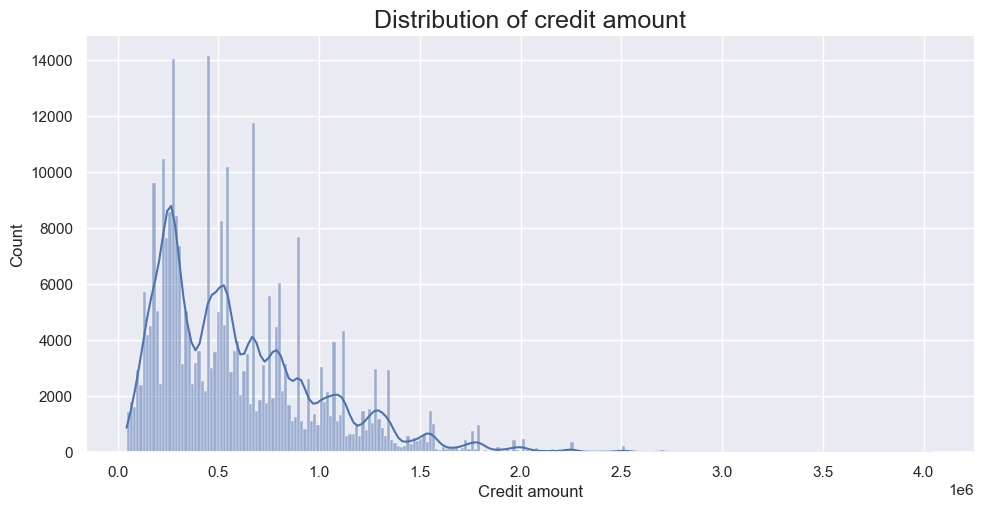

In [36]:
sns.displot(data=train, x="AMT_CREDIT", kde=True,height=5, aspect=2)
plt.title("Distribution of credit amount",fontsize=18)
plt.xlabel("Credit amount")
plt.show()

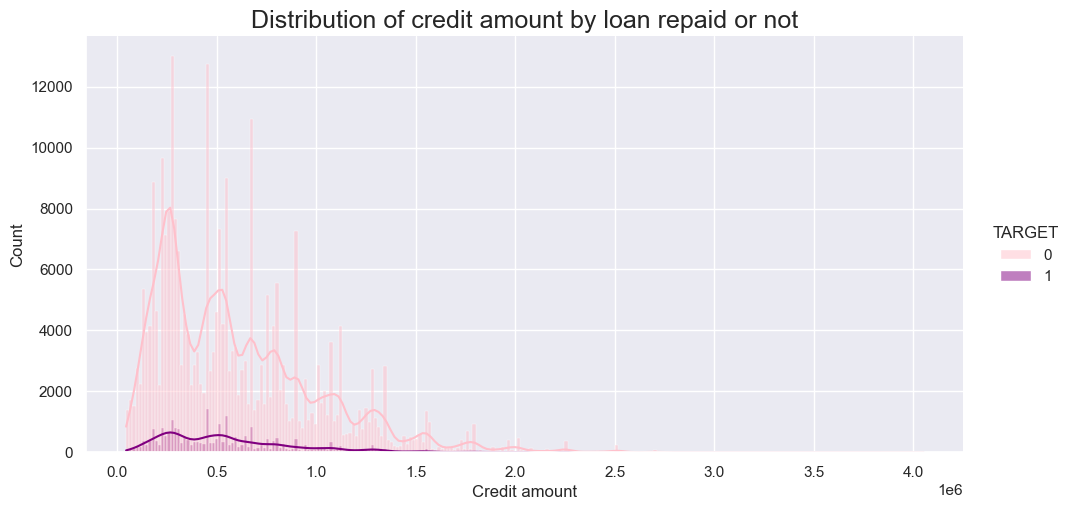

In [37]:
sns.displot(data=train, x="AMT_CREDIT",hue="TARGET", kde=True,height=5, aspect=2,palette=['pink', 'purple'])
plt.title("Distribution of credit amount by loan repaid or not",fontsize=18)
plt.xlabel("Credit amount")
plt.show()

### Distribution of total income

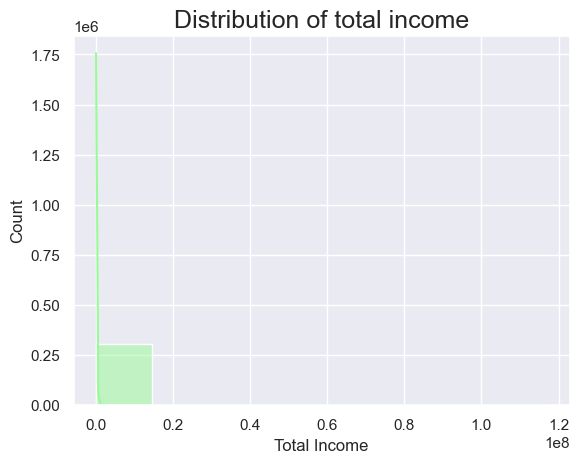

In [38]:
sns.histplot(data=train, x="AMT_INCOME_TOTAL",bins=8,kde=True,color="palegreen")
plt.title("Distribution of total income",fontsize=18)
plt.xlabel("Total Income")
plt.show()

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

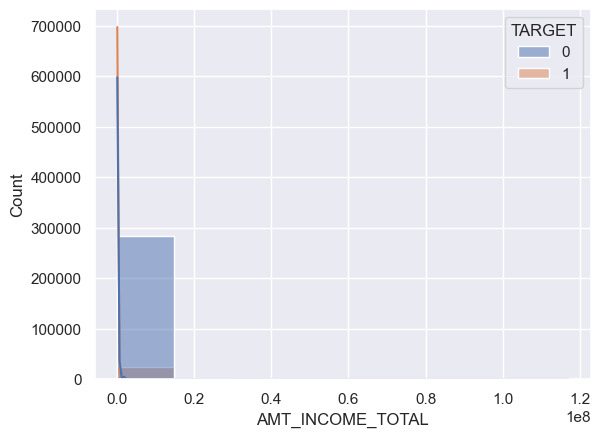

In [39]:
sns.histplot(data=train, x="AMT_INCOME_TOTAL",bins=8,kde=True,color="palegreen",hue="TARGET")

### Distribution of goods price

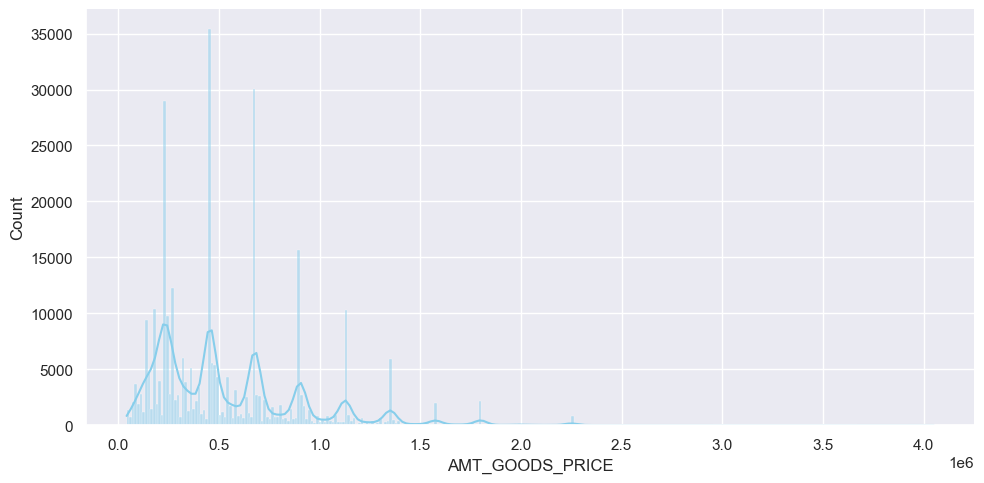

In [40]:
sns.displot(data=train, x="AMT_GOODS_PRICE", color="skyblue",kde=True, height=5, aspect=2)
plt.show()

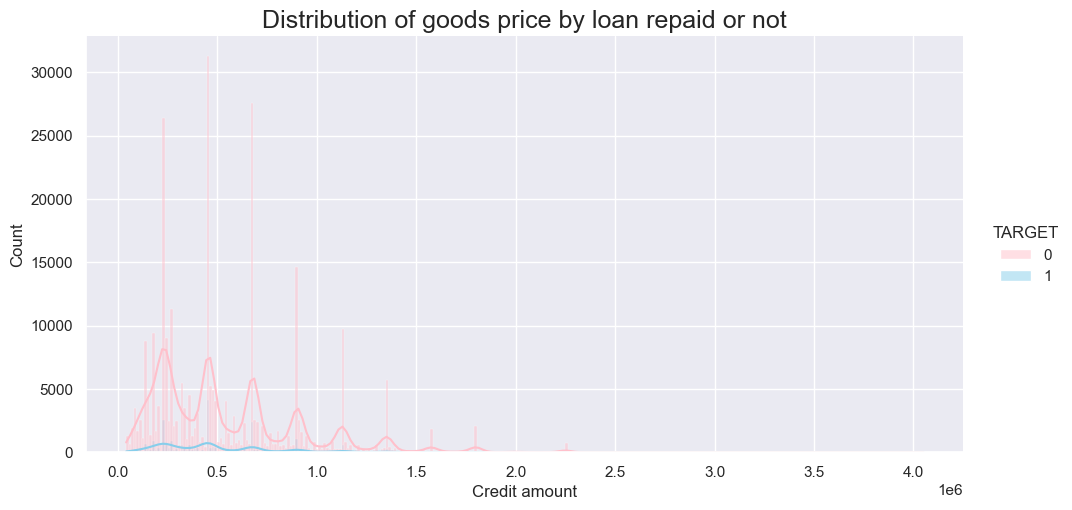

In [41]:
sns.displot(data=train, x="AMT_GOODS_PRICE",hue="TARGET", kde=True,height=5, aspect=2,palette=['pink', 'skyblue'])
plt.title("Distribution of goods price by loan repaid or not",fontsize=18)
plt.xlabel("Credit amount")
plt.show()

### Distibution of annuity

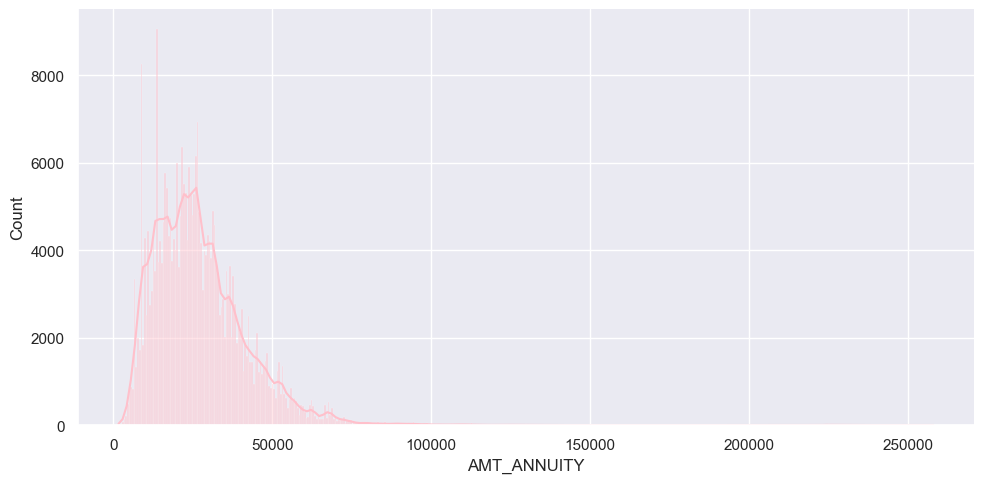

In [42]:
sns.displot(data=train, x="AMT_ANNUITY", color="pink", kde=True,height=5, aspect=2)
plt.show()

### Distribution of credit amount

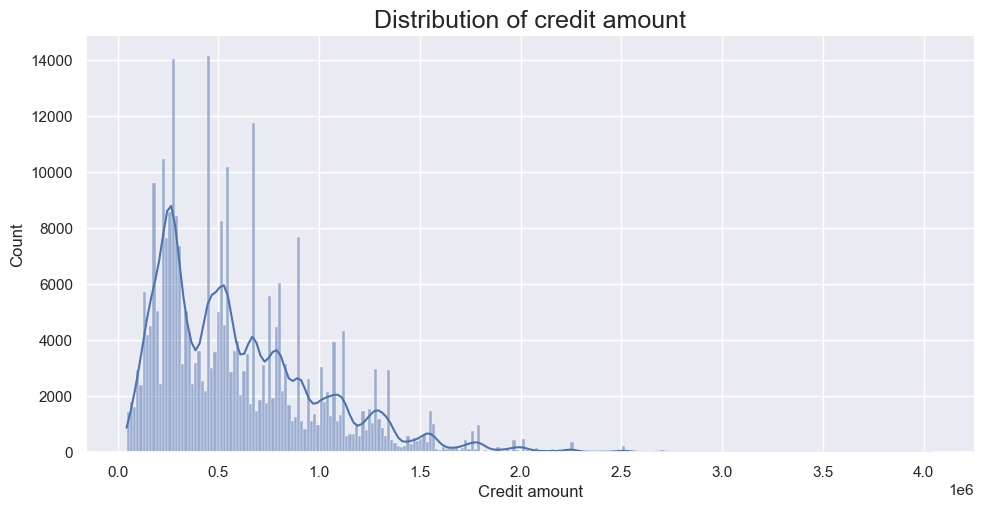

In [43]:
sns.displot(data=train, x="AMT_CREDIT", kde=True,height=5, aspect=2)
plt.title("Distribution of credit amount",fontsize=18)
plt.xlabel("Credit amount")
plt.show()

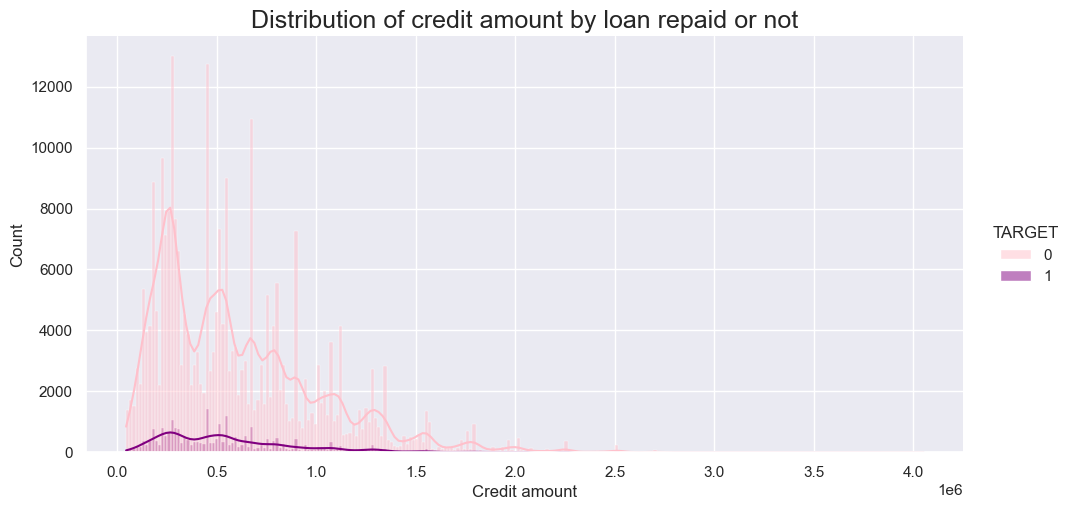

In [44]:
sns.displot(data=train, x="AMT_CREDIT",hue="TARGET", kde=True,height=5, aspect=2,palette=['pink', 'purple'])
plt.title("Distribution of credit amount by loan repaid or not",fontsize=18)
plt.xlabel("Credit amount")
plt.show()

### Distribution of total income

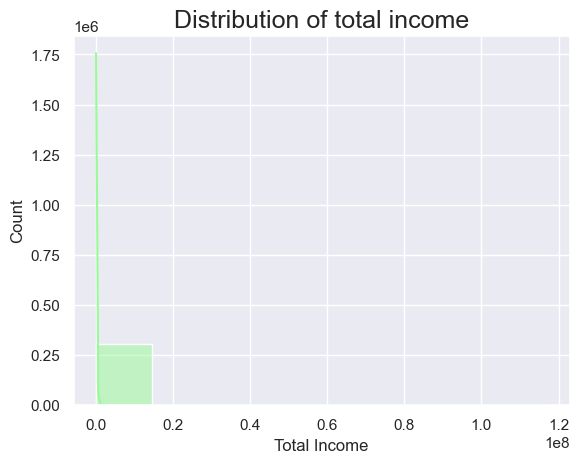

In [45]:
sns.histplot(data=train, x="AMT_INCOME_TOTAL",bins=8,kde=True,color="palegreen")
plt.title("Distribution of total income",fontsize=18)
plt.xlabel("Total Income")
plt.show()

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Count'>

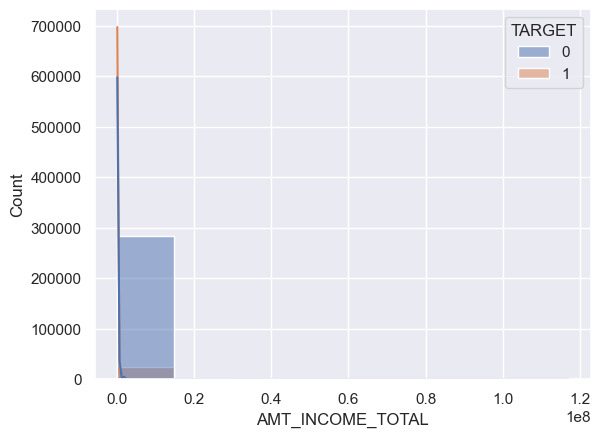

In [46]:
sns.histplot(data=train, x="AMT_INCOME_TOTAL",bins=8,kde=True,color="palegreen",hue="TARGET")

### Distribution of goods price

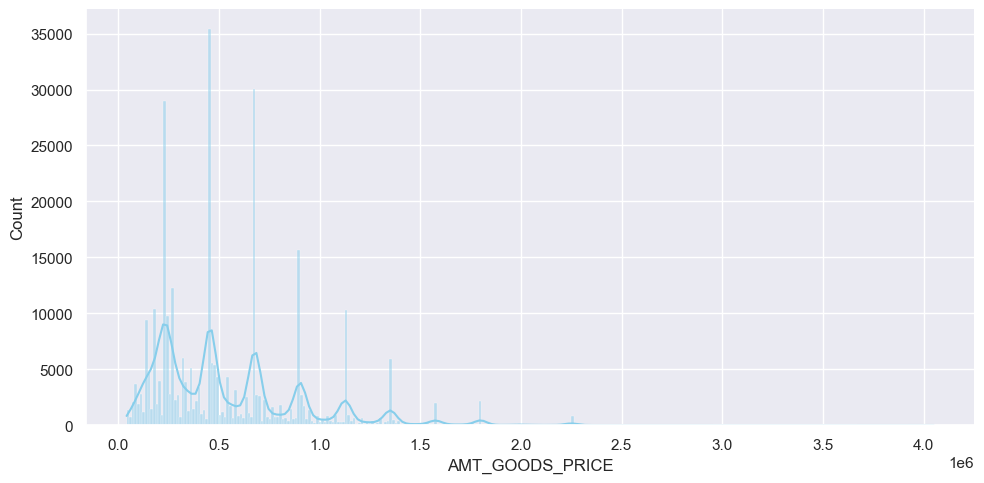

In [47]:
sns.displot(data=train, x="AMT_GOODS_PRICE", color="skyblue",kde=True, height=5, aspect=2)
plt.show()

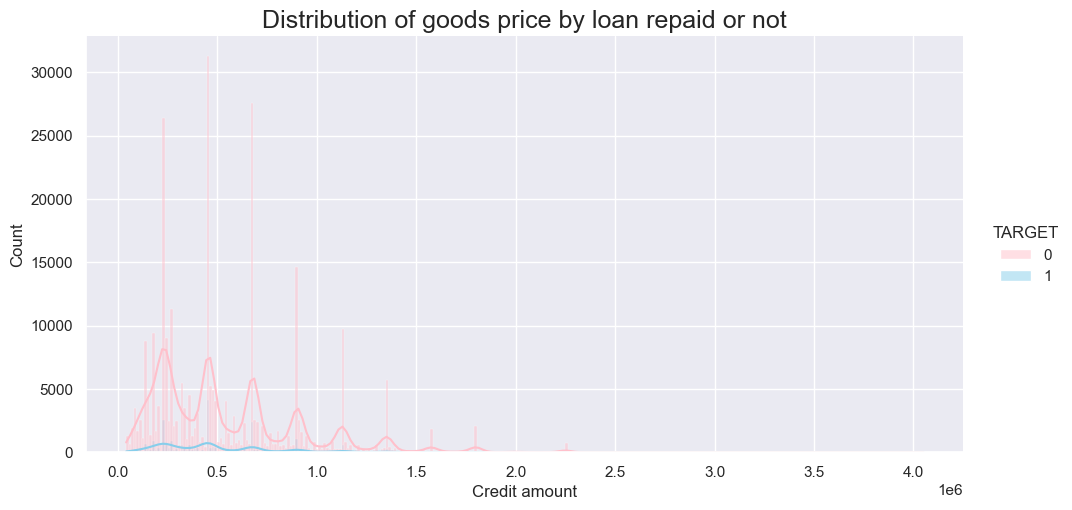

In [48]:
sns.displot(data=train, x="AMT_GOODS_PRICE",hue="TARGET", kde=True,height=5, aspect=2,palette=['pink', 'skyblue'])
plt.title("Distribution of goods price by loan repaid or not",fontsize=18)
plt.xlabel("Credit amount")
plt.show()

### Distibution of annuity

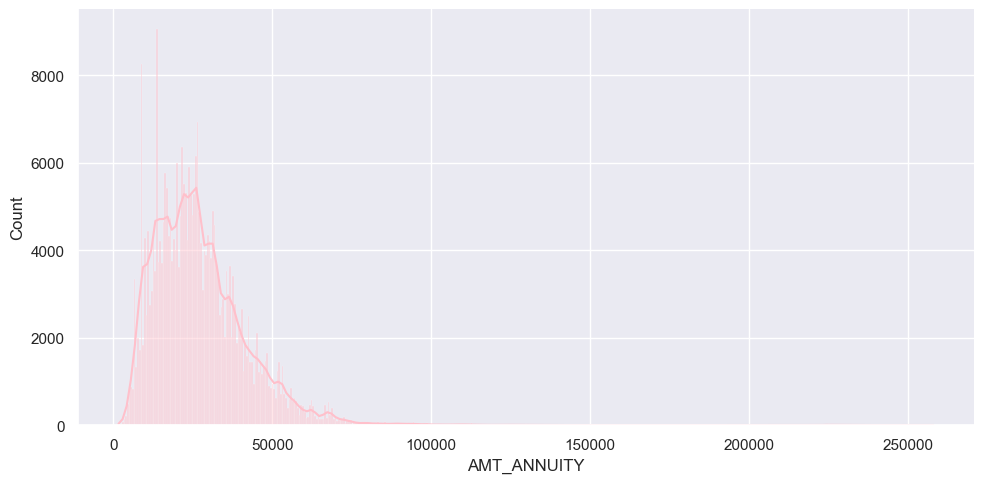

In [49]:
sns.displot(data=train, x="AMT_ANNUITY", color="pink", kde=True,height=5, aspect=2)
plt.show()

# Checking something - maybe to do more plots?

In [50]:
#checking how many times a goods price exceeds the amount of credit
AMT_GOODS_PRICE_greater_than_AMT_CREDIT=train[train["AMT_CREDIT"]<train["AMT_GOODS_PRICE"]]
print(len(AMT_GOODS_PRICE_greater_than_AMT_CREDIT))
AMT_GOODS_PRICE_greater_than_AMT_CREDIT[AMT_GOODS_PRICE_greater_than_AMT_CREDIT["NAME_CONTRACT_TYPE"]=="Revolving loans"]
#all of the data is revolving loan



260


TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
1942         0    Revolving loans           M            Y               Y   
2138         0    Revolving loans           M            Y               Y   
2808         0    Revolving loans           M            N               Y   
3769         0    Revolving loans           M            Y               Y   
4179         0    Revolving loans           M            Y               Y   
4858         0    Revolving loans           F            N               Y   
5838         0    Revolving loans           F            N               Y   
6654         0    Revolving loans           F            N               Y   
11372        0    Revolving loans           M            N               Y   
12420        0    Revolving loans           F            Y               Y   
13152        0    Revolving loans           F            N               Y   
15233        0    Revolving loans           M            Y               Y   
15251        0    Revolving loans           F            N               N   
15584        1    Revolving loans           M            N               Y   
21870        0    Revolving loans           F            Y               Y   
22814        0    Revolving loans           F            N               N   
22972        0    Revolving loans           F            N               Y   
26988        0    Revolving loans           F            N               Y   
30029        0    Revolving loans           M            Y               Y   
30360        0    Revolving loans           F            N               Y   
33165        0    Revolving loans           M            N               Y   
34004        0    Revolving loans           F            N               Y   
35149        0    Revolving loans           M            Y               N   
35805        0    Revolving loans           M            Y               Y   
37594        0    Revolving loans           F            N               Y   
39030        0    Revolving loans           M            Y               Y   
39064        1    Revolving loans           F            N               N   
40146        0    Revolving loans           F            N               N   
42450        0    Revolving loans           F            N               N   
44470        0    Revolving loans           M            N               Y   
45132        0    Revolving loans           F            N               Y   
45883        0    Revolving loans           M            N               Y   
46247        0    Revolving loans           F            N               Y   
46549        0    Revolving loans           F            Y               N   
46607        0    Revolving loans           F            N               Y   
46642        0    Revolving loans           F            Y               Y   
51321        0    Revolving loans           M            N               N   
52179        1    Revolving loans           M            Y               Y   
53701        0    Revolving loans           F            N               Y   
57531        0    Revolving loans           F            N               Y   
57568        0    Revolving loans           M            Y               Y   
58050        0    Revolving loans           F            N               Y   
59320        0    Revolving loans           M            Y               Y   
60479        0    Revolving loans           F            N               Y   
61678        1    Revolving loans           M            N               Y   
62388        0    Revolving loans           F            N               Y   
62764        0    Revolving loans           M            Y               Y   
64053        1    Revolving loans           M            Y               Y   
65378        0    Revolving loans           F            N               N   
67903        0    Revolving loans           F            N               Y   
68704        0    Revolving lo

In [51]:
AMT_GOODS_PRICE_lower_than_AMT_CREDIT=train[train["AMT_CREDIT"]>train["AMT_GOODS_PRICE"]]
AMT_GOODS_PRICE_lower_than_AMT_CREDIT[AMT_GOODS_PRICE_lower_than_AMT_CREDIT["NAME_CONTRACT_TYPE"]=="Revolving loans"]


TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
2612         0    Revolving loans           M            Y               Y   
5202         0    Revolving loans           F            N               Y   
5846         0    Revolving loans           F            N               Y   
8861         0    Revolving loans           F            Y               Y   
11811        0    Revolving loans           F            Y               Y   
12139        0    Revolving loans           F            N               Y   
15203        0    Revolving loans           F            Y               Y   
24628        0    Revolving loans           M            Y               Y   
34516        0    Revolving loans           F            N               Y   
35657        0    Revolving loans         XNA            Y               Y   
36376        0    Revolving loans           F            N               Y   
38566        0    Revolving loans         XNA            N               Y   
40074        0    Revolving loans           M            Y               Y   
40302        0    Revolving loans           F            N               Y   
42864        0    Revolving loans           F            N               N   
48247        0    Revolving loans           M            N               Y   
67292        0    Revolving loans           F            N               Y   
67414        0    Revolving loans           F            Y               N   
75080        0    Revolving loans           M            Y               Y   
78995        0    Revolving loans           F            N               Y   
83274        0    Revolving loans           F            N               Y   
83382        0    Revolving loans         XNA            N               Y   
85205        0    Revolving loans           M            N               N   
91613        0    Revolving loans           F            Y               Y   
93640        0    Revolving loans           F            N               N   
93957        1    Revolving loans           F            Y               Y   
95669        0    Revolving loans           M            Y               Y   
101856       0    Revolving loans           F            N               Y   
105209       0    Revolving loans           F            N               Y   
108253       0    Revolving loans           F            N               Y   
114589       0    Revolving loans           F            N               Y   
120112       0    Revolving loans           F            N               N   
125187       0    Revolving loans           F            N               Y   
130488       0    Revolving loans           F            N               Y   
134573       0    Revolving loans           M            Y               Y   
136025       0    Revolving loans           F            Y               Y   
141964       0    Revolving loans           F            N               Y   
145149       0    Revolving loans           F            N               Y   
157269       0    Revolving loans           F            N               Y   
160335       1    Revolving loans           M            N               Y   
167370       0    Revolving loans           M            N               Y   
169894       0    Revolving loans           M            N               Y   
175496       0    Revolving loans           F            N               Y   
179162       0    Revolving loans           F            Y               Y   
180928       0    Revolving loans           F            N               Y   
184824       1    Revolving loans           F            N               Y   
195686       0    Revolving loans           F            N               Y   
200336       0    Revolving loans           M            Y               N   
202690       0    Revolving loans           F            N               Y   
219029       0    Revolving loans           F            N               Y   
221031       0    Revolving lo

Everyone applied for a loan only once, so there is no duplicate in ID.